In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("Raw_Housing_Prices.csv")

In [3]:
data.head(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1230000.0,4,4.50,5420.0,101930.0,1.0,No,None,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,None,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,None,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,None,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,None,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


# Target Variables

In [4]:
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [5]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

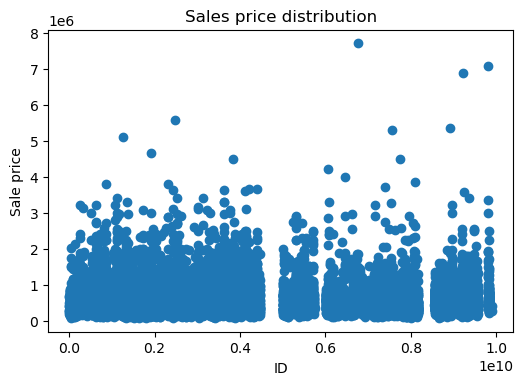

In [7]:
#Treating Outliers in the target column
#Lets visualise inorder to check if we have any outliers or not
plt.figure(dpi=100)
plt.scatter(data['ID'],data['Sale Price'])
plt.xlabel("ID")
plt.ylabel("Sale price")
plt.title("Sales price distribution")
plt.show()

In [8]:
#We can see there are some outliers with high values. So lets look at the discriptive statistics
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [9]:
#Lets treat the outliers by finding the interquartile range
q1=data['Sale Price'].quantile(0.25)
q3=data['Sale Price'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
(lower_limit,upper_limit)

(-162625.0, 1129575.0)

In [10]:
#Imputing the outliers
def imputer_outliers(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [11]:
data['Sale Price']=data['Sale Price'].apply(imputer_outliers)

In [12]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

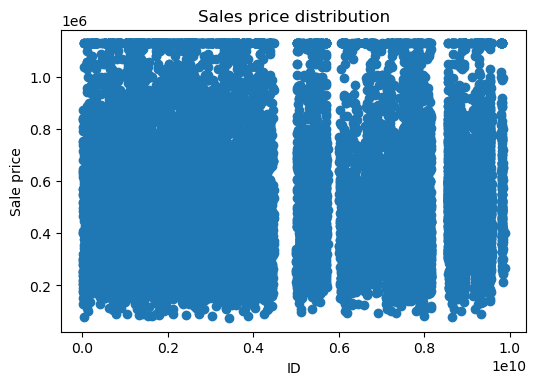

In [13]:
#lets again visualise the saleprice column inorder to make sure that we have successfully treated all the outliers
plt.figure(dpi=100)
plt.scatter(data['ID'],data['Sale Price'])
plt.xlabel("ID")
plt.ylabel("Sale price")
plt.title("Sales price distribution")
plt.show()

In [14]:
#So now we have treated the outliers.Lets now remove the null values from our target column
data['Sale Price'].isnull().sum()

4

In [15]:
len(data['Sale Price']),len(data)

(21613, 21613)

In [16]:
#Drop the columns with missing saleprice value
data.dropna(axis=0,inplace=True,subset=['Sale Price'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

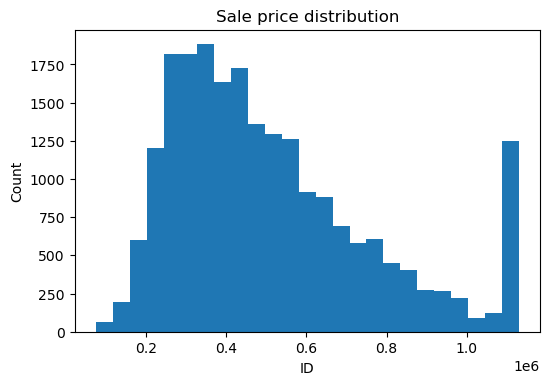

In [18]:
#Let's view the distribution of the target variable
plt.figure(dpi=100)
plt.hist(data['Sale Price'],bins=25)
plt.xlabel('ID')
plt.ylabel("Count")
plt.title("Sale price distribution")
plt.show()

# Numeric Variable

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [20]:
data.head(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1129575.0,4,4.50,5420.0,101930.0,1.0,No,None,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,None,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,None,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,None,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,None,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


In [21]:
#Lets impute all the missing values in numeric variable column
numeric_feature=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[numeric_feature]=imputer.fit_transform(data[numeric_feature])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [23]:
#Ok so now we are only left with one column having missing values i.e Zipcode.So lets impute it with most frequent zipcode in the respective column
data['Zipcode'].shape

(21609,)

In [24]:
column=data['Zipcode'].values.reshape(-1,1)

In [25]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(column)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Transformation of numeric variable

In [27]:
data['Zipcode']=data['Zipcode'].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [28]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [29]:
data['No of Times Visited']=data['No of Times Visited'].map({'None':0,'Once':1,'Twice':2,'Thrice':3,'Four':4})

In [30]:
#lets create 2 columns ever_renovated and yr_since_renovated to kepp track of the houses renovated and their renovation year
data['ever_renovated']=np.where(data['Renovated Year']==0,'No','Yes')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503,No


In [31]:
data['yr_sold']=pd.DatetimeIndex(data['Date House was Sold']).year
data['yr_since_renovation']=np.where(data['ever_renovated']=='Yes',abs(data['yr_sold']-data['Renovated Year']),0)
data.head()


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,yr_sold,yr_since_renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0


In [32]:
#drop the used columns
data.drop(columns=['Date House was Sold','Renovated Year','yr_sold'],inplace=True)

In [33]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,yr_since_renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


In [34]:
data.corr()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),yr_since_renovation
ID,1.000000,-0.011529,0.001450,0.005233,-0.012379,-0.132153,0.018653,0.011552,0.013762,-0.010724,-0.005189,-0.021524,-0.001983,0.020720,-0.002913,-0.138843,-0.016227
Sale Price,-0.011529,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.001450,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.005233,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),-0.012379,0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),-0.132153,0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.018653,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.011552,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.013762,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),-0.010724,0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491


# Categorical Features

In [35]:
categorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']
categorical_feature

['Waterfront View', 'Condition of the House', 'Zipcode', 'ever_renovated']

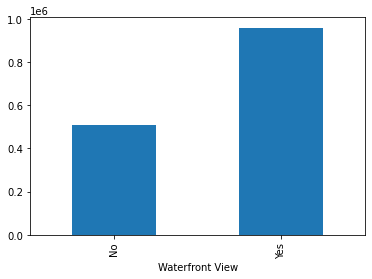

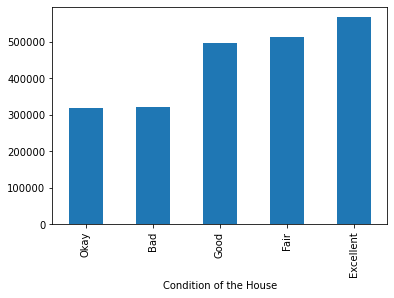

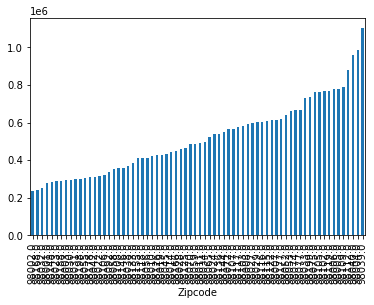

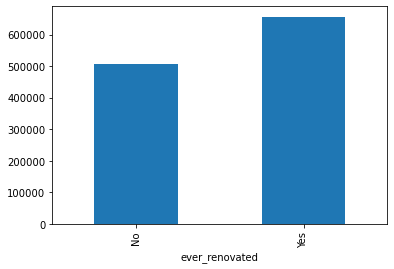

In [36]:
#lets visualise the distribution of each categorical feature
for feature in categorical_feature:
    data.groupby(feature)['Sale Price'].mean().sort_values().plot(kind='bar')
    plt.show()

In [37]:
#Lets analyse the variance of the categorical features using ANOVA
#but before analysing first lets convert the column  names as there shouls not be any space between the names in python
from statsmodels.formula.api import ols
import statsmodels.api as sm
data=data.rename(columns={'Sale Price':'Sale_price','Waterfront View':'Waterfront_view','Condition of the House':'Condition_of_the_House'})



In [38]:
mod=ols('Sale_price~Waterfront_view',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_view,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [39]:
mod=ols('Sale_price~Zipcode',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,6.859657e+14,69.0,321.902033,0.0
Residual,6.652044e+14,21539.0,NaN,NaN


In [40]:
mod=ols('Sale_price~Condition_of_the_House',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [41]:
mod=ols('Sale_price~ever_renovated',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
ever_renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


# Binning

In [42]:
#lets bin zipcode variable
zip_table=data.groupby('Zipcode').agg({'Sale_price':'mean'}).sort_values('Sale_price',ascending=True)
zip_table.head()

,Sale_price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [43]:
zip_table['Zip_Code']=pd.cut(zip_table['Sale_price'],bins=10,labels=['Zipcode_0','Zipcode_1','Zipcode_2','Zipcode_3','Zipcode_4','Zipcode_5','Zipcode_6','Zipcode_7','Zipcode_8','Zipcode_9'],include_lowest=True)

In [44]:
zip_table.drop(columns='Sale_price',inplace=True)

In [45]:
zip_table.head()

,Zip_Code
Zipcode,
98002.0,Zipcode_0
98168.0,Zipcode_0
98032.0,Zipcode_0
98001.0,Zipcode_0
98148.0,Zipcode_0


In [46]:
data=pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)
data=data.drop(columns='Zipcode')
data.head()

,ID,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,yr_since_renovation,Zip_Code
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,47.5112,-122.257,1340.0,5650,No,0,Zipcode_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,47.7210,-122.319,1690.0,7639,Yes,26,Zipcode_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,47.7379,-122.233,2720.0,8062,No,0,Zipcode_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,47.5208,-122.393,1360.0,5000,No,0,Zipcode_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,47.6168,-122.045,1800.0,7503,No,0,Zipcode_4


In [47]:
mapping={'Okay':0,'Bad':0,'Good':1,'Fair':1,'Excellent':2}

In [48]:
data['Condition_of_the_House']=data['Condition_of_the_House'].map(mapping)

In [49]:
data.head()

,ID,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,yr_since_renovation,Zip_Code
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,1,...,1180.0,0,63,47.5112,-122.257,1340.0,5650,No,0,Zipcode_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,1,...,2170.0,400,67,47.7210,-122.319,1690.0,7639,Yes,26,Zipcode_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,1,...,770.0,0,85,47.7379,-122.233,2720.0,8062,No,0,Zipcode_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,2,...,1050.0,910,53,47.5208,-122.393,1360.0,5000,No,0,Zipcode_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,1,...,1680.0,0,31,47.6168,-122.045,1800.0,7503,No,0,Zipcode_4


# Dummy Variables

In [50]:
data=pd.get_dummies(data,columns=['Zip_Code','ever_renovated','Waterfront_view'],drop_first=True)

In [51]:
data.head()

,ID,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,...,Zip_Code_Zipcode_2,Zip_Code_Zipcode_3,Zip_Code_Zipcode_4,Zip_Code_Zipcode_5,Zip_Code_Zipcode_6,Zip_Code_Zipcode_7,Zip_Code_Zipcode_8,Zip_Code_Zipcode_9,ever_renovated_Yes,Waterfront_view_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,1,7,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,1,7,...,1,0,0,0,0,0,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,1,6,...,1,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,2,7,...,0,1,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,1,8,...,0,0,1,0,0,0,0,0,0,0


In [52]:
data.drop(columns="ID",inplace=True)
data.head()

,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,Zip_Code_Zipcode_2,Zip_Code_Zipcode_3,Zip_Code_Zipcode_4,Zip_Code_Zipcode_5,Zip_Code_Zipcode_6,Zip_Code_Zipcode_7,Zip_Code_Zipcode_8,Zip_Code_Zipcode_9,ever_renovated_Yes,Waterfront_view_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,1,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,1,7,2170.0,...,1,0,0,0,0,0,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,1,6,770.0,...,1,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,2,7,1050.0,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,1,8,1680.0,...,0,0,1,0,0,0,0,0,0,0


# Scaling the dataset

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=data["Sale_price"]
X=scaler.fit_transform(data.drop(columns=['Sale_price']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale_price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zip_Code_Zipcode_2,Zip_Code_Zipcode_3,Zip_Code_Zipcode_4,Zip_Code_Zipcode_5,Zip_Code_Zipcode_6,Zip_Code_Zipcode_7,Zip_Code_Zipcode_8,Zip_Code_Zipcode_9,ever_renovated_Yes,Waterfront_view_Yes
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.240418,-0.563993,-0.734722,-0.658697,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.240418,-0.563993,0.460990,0.245134,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,4.758385,-0.087181
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-0.240418,-1.468566,-1.229916,-0.658697,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,3.225353,-0.563993,-0.891735,1.397518,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,-0.240418,0.340581,-0.130827,-0.658697,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181


# Checking and removing multicollinearity

In [54]:

X.corr()


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zip_Code_Zipcode_2,Zip_Code_Zipcode_3,Zip_Code_Zipcode_4,Zip_Code_Zipcode_5,Zip_Code_Zipcode_6,Zip_Code_Zipcode_7,Zip_Code_Zipcode_8,Zip_Code_Zipcode_9,ever_renovated_Yes,Waterfront_view_Yes
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.046951,0.349223,0.477549,0.303294,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,0.018573,-0.006578
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,-0.002280,0.635638,0.685088,0.283798,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,0.050282,0.063761
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.007678,0.705725,0.876226,0.435142,...,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253,0.055111,0.103841
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,-0.025938,0.102314,0.183492,0.015252,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,0.007736,0.021605
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,-0.092188,0.461368,0.524031,-0.245572,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,0.006297,0.023719
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.037401,0.223661,0.167812,0.276974,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,0.104051,0.401856
Condition_of_the_House,0.046951,-0.002280,0.007678,-0.025938,-0.092188,0.037401,1.000000,-0.041292,-0.060636,0.129535,...,0.009942,0.017348,-0.019278,0.014344,0.033440,0.026529,0.014115,-0.004902,-0.025025,0.012406
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,-0.041292,1.000000,0.705153,0.145232,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,0.010010,0.070332
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,-0.060636,0.705153,1.000000,-0.051825,...,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398,0.023202,0.072099
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.129535,0.145232,-0.051825,1.000000,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,0.070969,0.080595


In [55]:
k=X.corr()
corelated_columns=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
corelated_columns,len(corelated_columns)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# Calculating VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
#calculating vif for every columns
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                  1.635971
No of Bathrooms                                 3.372043
Flat Area (in Sqft)                          1481.623726
Lot Area (in Sqft)                              2.105888
No of Floors                                    2.106159
No of Times Visited                             1.432192
Condition_of_the_House                          1.079159
Overall Grade                                   2.954144
Area of the House from Basement (in Sqft)    1205.513049
Basement Area (in Sqft)                       345.436003
Age of House (in Years)                         2.456914
Latitude                                        2.446068
Longitude                                       1.670287
Living Area after Renovation (in Sqft)          3.063416
Lot Area after Renovation (in Sqft)             2.143129
yr_since_renovation                             2.777031
Zip_Code_Zipcode_1                              1.537710
Zip_Code_Zipcode_2             

In [57]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [58]:
def mc_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range (data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0]," Has been removed")
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present")
        return data
    

In [59]:
for i in range(16):
    vif_data=mc_remover(vif_data)
    
vif_data.head()

Flat Area (in Sqft)  Has been removed
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zip_Code_Zipcode_2,Zip_Code_Zipcode_3,Zip_Code_Zipcode_4,Zip_Code_Zipcode_5,Zip_Code_Zipcode_6,Zip_Code_Zipcode_7,Zip_Code_Zipcode_8,Zip_Code_Zipcode_9,ever_renovated_Yes,Waterfront_view_Yes
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.240418,-0.563993,-0.734722,-0.658697,0.544734,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.240418,-0.563993,0.460990,0.245134,0.680915,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,4.758385,-0.087181
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-0.240418,-1.468566,-1.229916,-0.658697,1.293731,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,3.225353,-0.563993,-0.891735,1.397518,0.204281,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,-0.240418,0.340581,-0.130827,-0.658697,-0.544715,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.210155,-0.087181


# Train/Test Split

In [60]:
X=vif_data
y=data['Sale_price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape,y_train.shape,y_test.shape,y_test.shape

((15126, 26), (15126,), (6483,), (6483,))

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize=True)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [62]:
regressor.coef_

array([ -4193.99361383,  13767.87264784,  10280.73553866,   3339.56645141,
        27598.03492923,  11815.47366419,  59469.79038052,  80690.89681417,
        28709.715827  ,  31974.161861  ,  20916.9748093 , -22181.69205852,
        15787.36125845,   -630.82318692, -11366.92810995,  12086.38775388,
        34031.53982105,  61842.82169138,  79843.15191898,  50995.09680026,
        73792.16645415,  39551.76986015,  67780.61402516,  20739.89174023,
        14928.28742056,  11319.84760156])

In [63]:
regressor.score(X_test,y_test)

0.8468043028323836

In [64]:
y_pred=regressor.predict(X_test)


# 1.Residuals

In [65]:
residuals=y_pred-y_test
residual_table=pd.DataFrame({'residuals':residuals,'prediction':y_pred})
residual_table.head()

,residuals,prediction
4984,-62160.532763,507839.467237
10256,-170480.144815,549520.855185
4046,-81630.872205,185369.127795
21269,15350.867935,380350.867935
10496,109465.466102,506465.466102


In [66]:
residual_tabel=residual_table.sort_values(by='prediction')


In [67]:
k=[i for i in range(int(residual_table['prediction'].max()))]
z=[0 for i in range(int(residual_table['prediction'].max()))]
                    

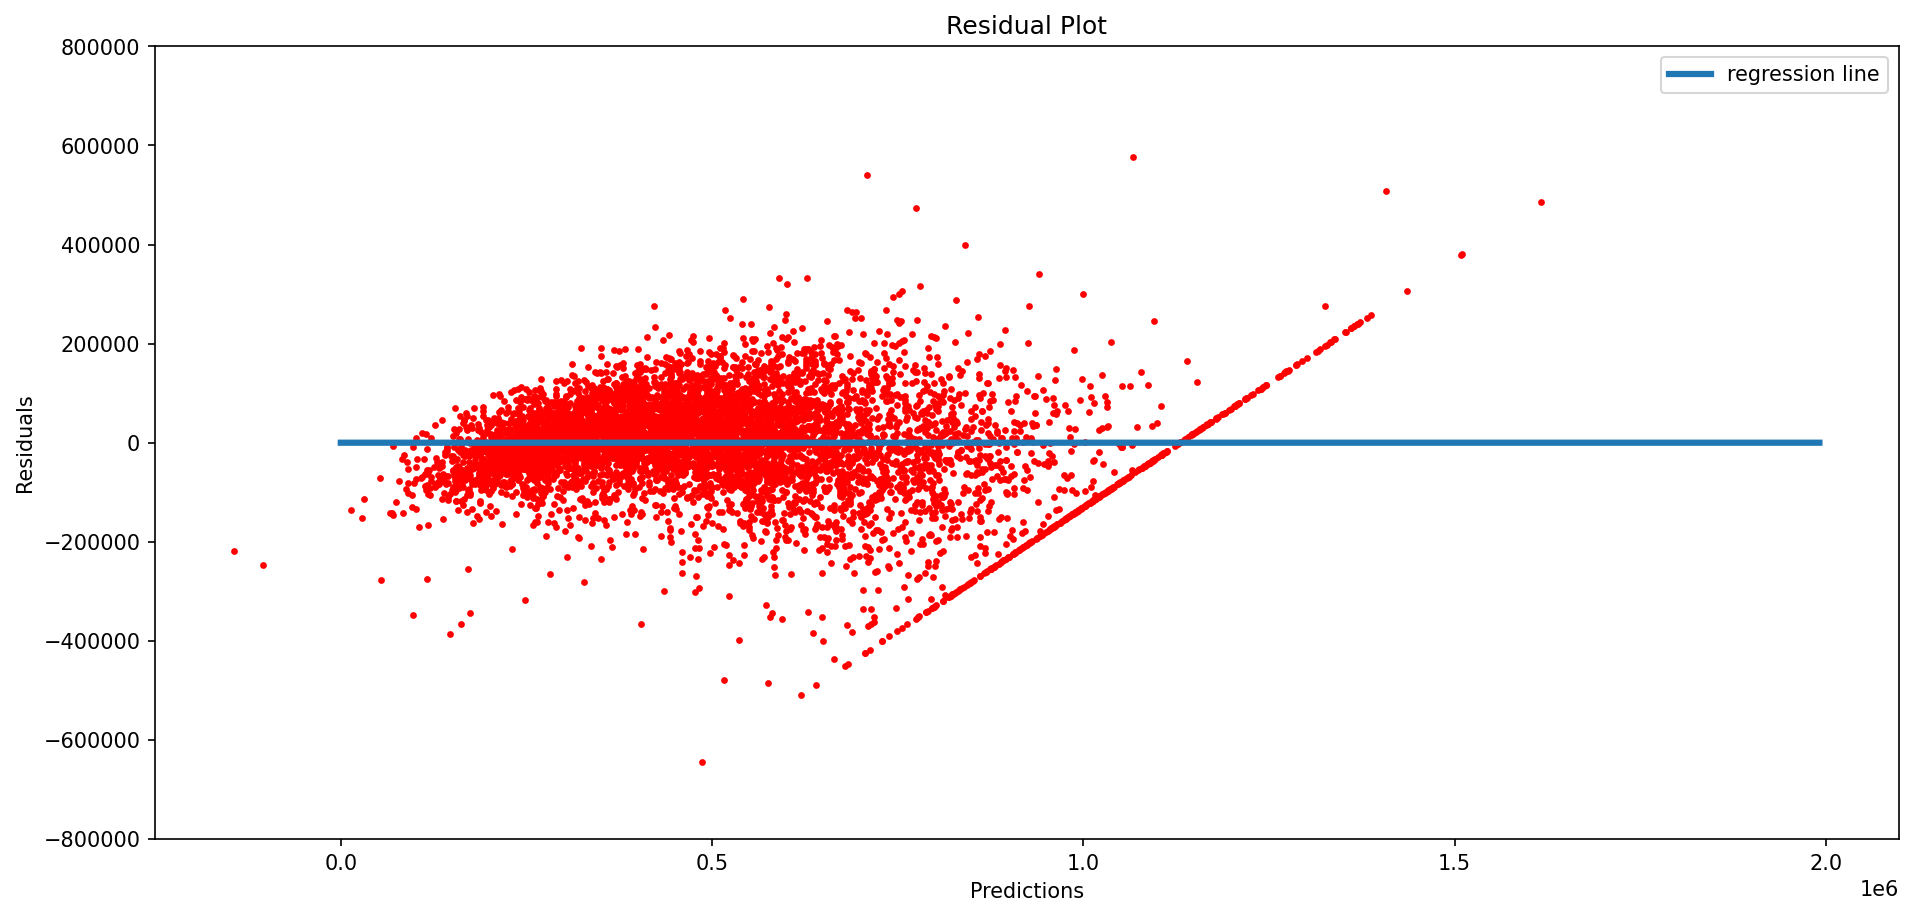

In [68]:
plt.figure(dpi=150,figsize=(15,7))
plt.scatter(residual_table['prediction'],residual_table['residuals'],color='red',s=5)
plt.plot(k,z,linewidth=3,label='regression line')
plt.ylim(-800000,800000)
plt.legend()
plt.title("Residual Plot")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

# 2.Distribution of errors

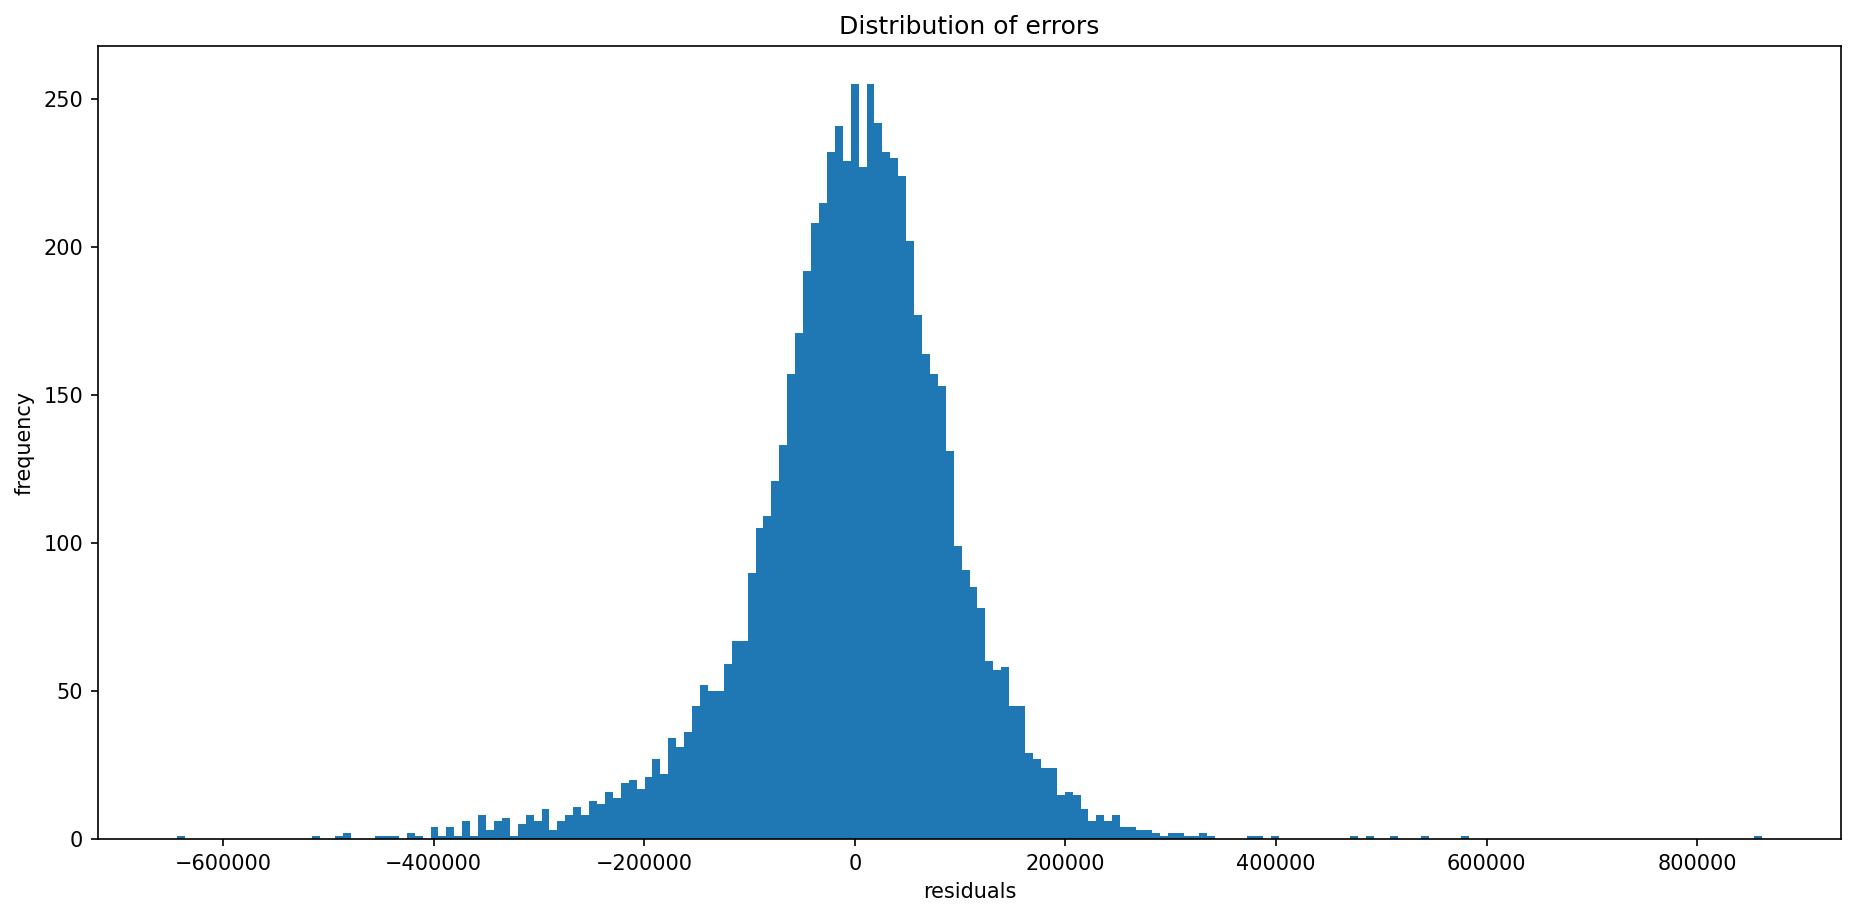

In [69]:
plt.figure(dpi=150,figsize=(15,7))
plt.hist(residual_table['residuals'],bins=200)
plt.title("Distribution of errors")
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.show()

# Model Coefficients

In [70]:
coefficients_table=pd.DataFrame({'column':X_train.columns,'coefficient':regressor.coef_})
coefficients_table=coefficients_table.sort_values(by='coefficient')

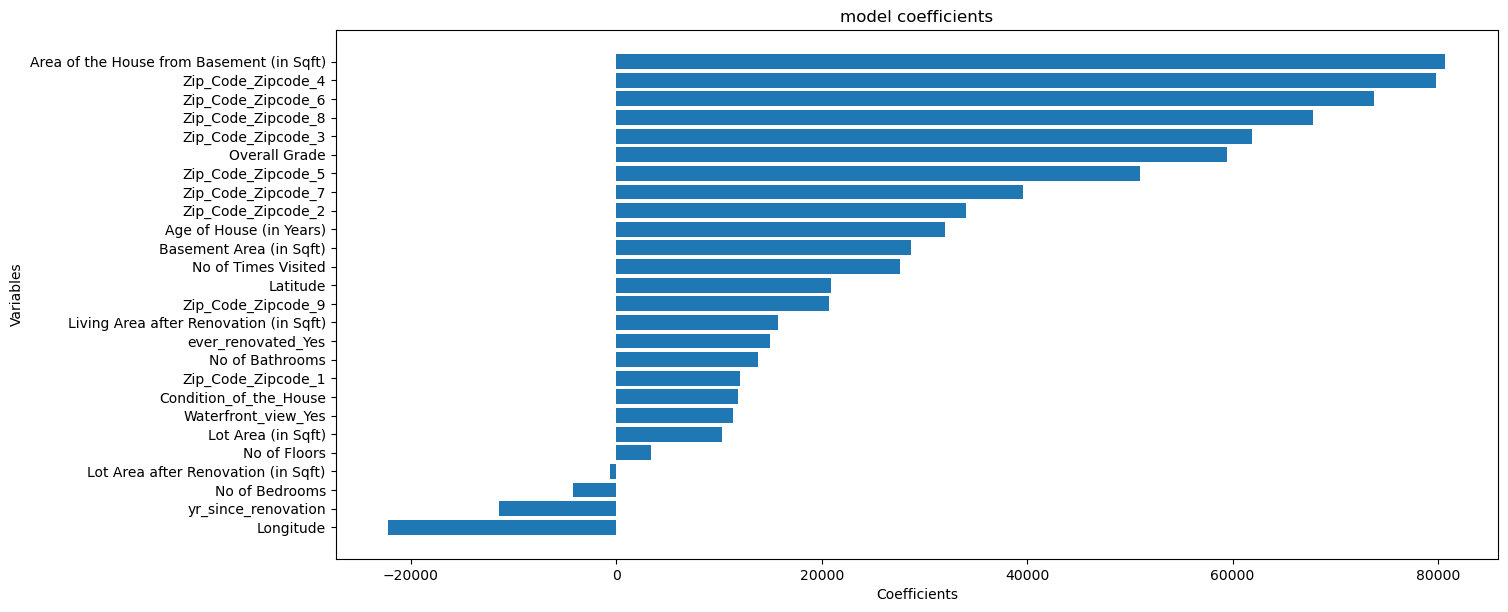

In [71]:
plt.figure(dpi=100,figsize=(15,7))
plt.barh(coefficients_table['column'],coefficients_table['coefficient'])
plt.xlabel("Coefficients")
plt.ylabel("Variables")
plt.title("model coefficients")
plt.show()